In [108]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_plot(blur_im, threshold, label=''):
    #blur_im = cv2.GaussianBlur(image,(5,5),0)
    ret, th = cv2.threshold(blur_im,threshold,255,cv2.THRESH_BINARY)
    
    f, axarr = plt.subplots(1, 3, figsize=(25, 5))
    f.suptitle('Channel: %s'%label, fontsize=16);
    axarr[0].imshow(blur_im, cmap='gray')
    axarr[1].hist(blur_im.ravel(),256)
    axarr[1].axvline(x=threshold)
    axarr[2].imshow(th, cmap='gray')
    
def colorspace_plot(image):
    f, axarr = plt.subplots(1, image.shape[2], figsize=(25, 5))
    for ind in range(image.shape[2]):
        axarr[ind].imshow(image[:,:,ind], cmap='gray')
        
cv_image = cv2.imread('../catkin_ws_user/src/assignment5_detection/src/001.png')
color_spaces = [(0,cv2.COLOR_BGR2RGB, "R"), (1,cv2.COLOR_BGR2RGB, "G"), (2,cv2.COLOR_BGR2RGB,"B"), 
                (2,cv2.COLOR_BGR2HSV, "V"), (0,cv2.COLOR_BGR2YUV, "Y")]

## Farbräume

Wir betrachten zuerst die Farbräume *RGB*, *HSV* und *YUV* um zu entscheiden, nach welchem Kanal wir in den jeweiligen Farbräumen segmentieren werden. Bei RGB scheint die Entscheidung relativ beliebig und wir entscheiden uns für den Rot-Kanal. Bei HSV und YUV scheinen die V- und Y-Kanäle optimal zur Segmentierung.

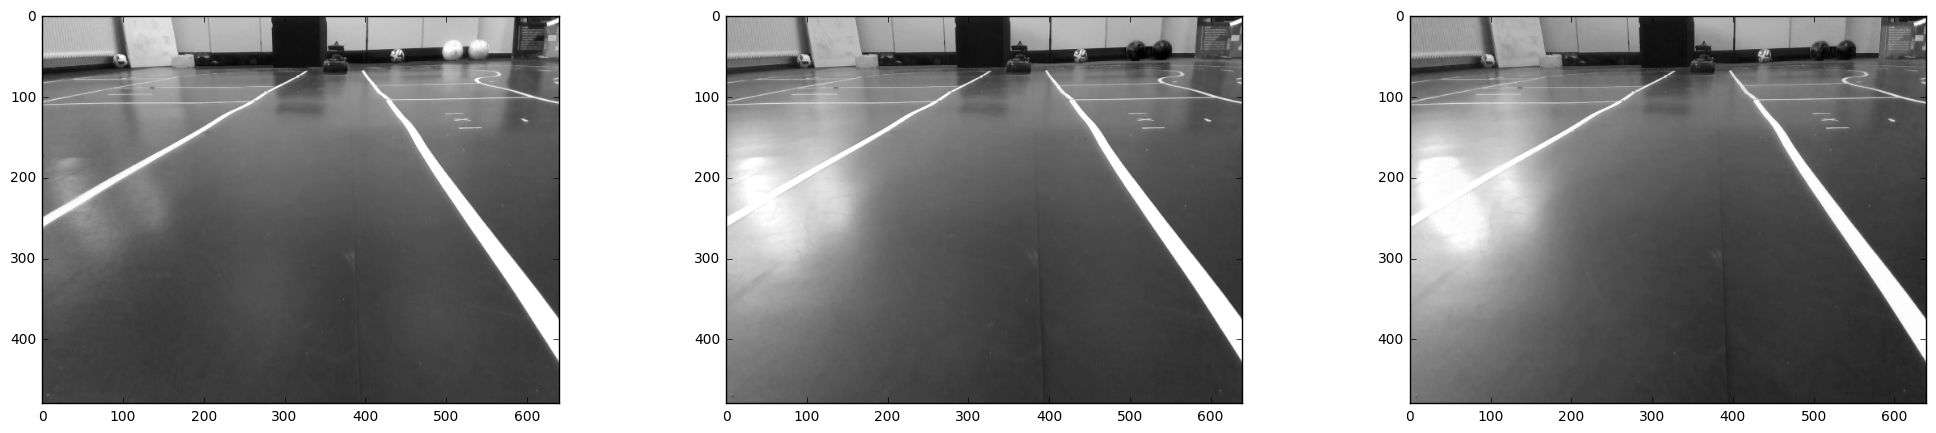

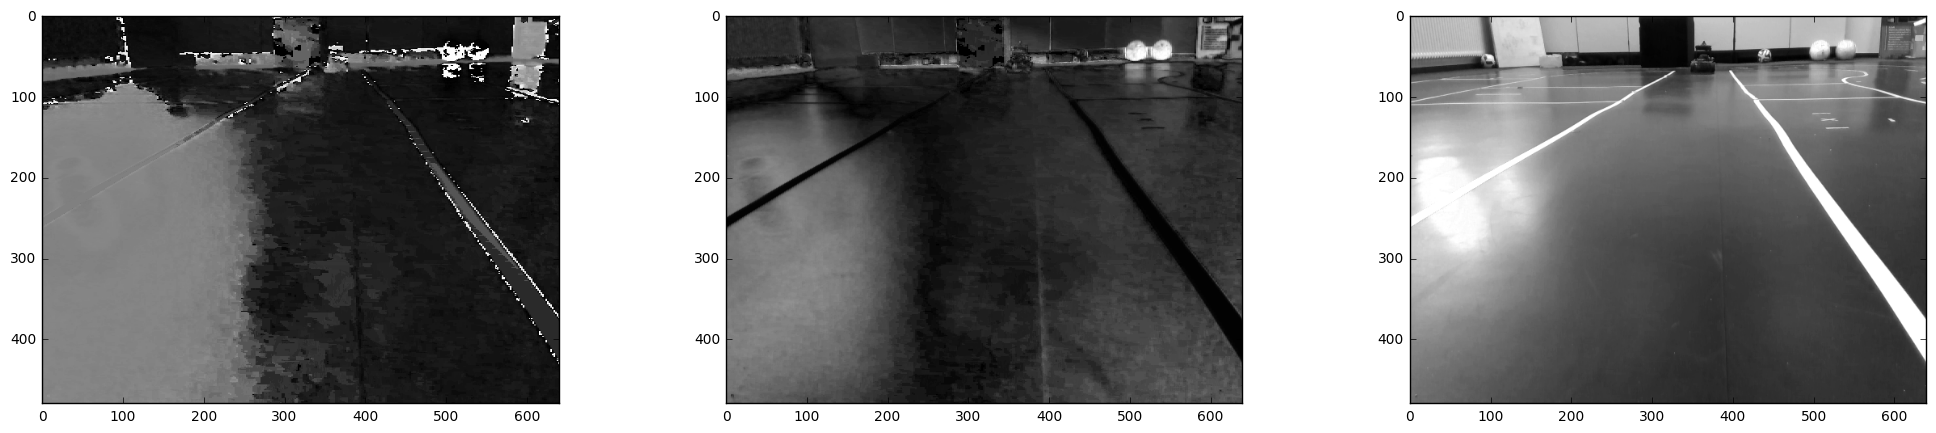

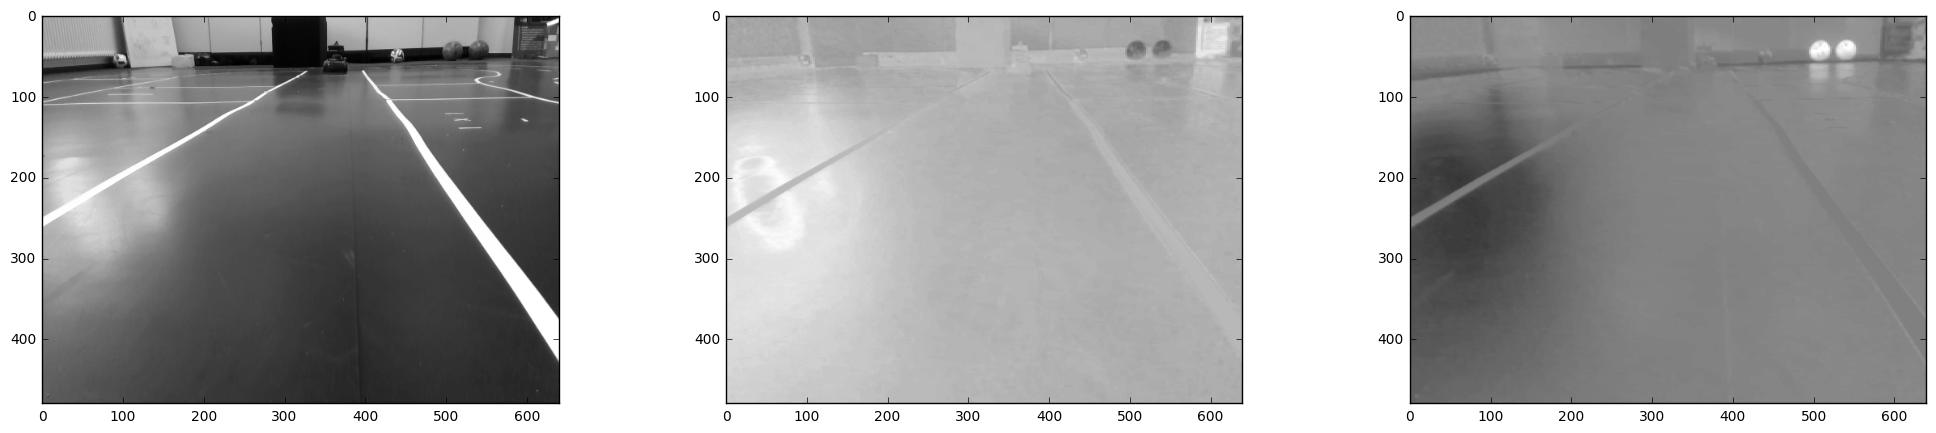

In [112]:
# plot color spaces
space_indices = [0,3,4]
for ind, cspace, label in [color_spaces[i] for i in space_indices]:
    colorspace_plot(cv2.cvtColor(cv_image,cspace))

## Beste Segmentierung

Insgesamt scheint sich der Y-Kanal vom YUV-Farbraum am besten zur Segmentierung von Bildern zu eignen, wie die folgenden Bilder zeigen. Eim guter Threshold war hier für uns 250.

Die segmentierten Bilder wurden auf einem Publisher in ROS verfügbar gemacht.

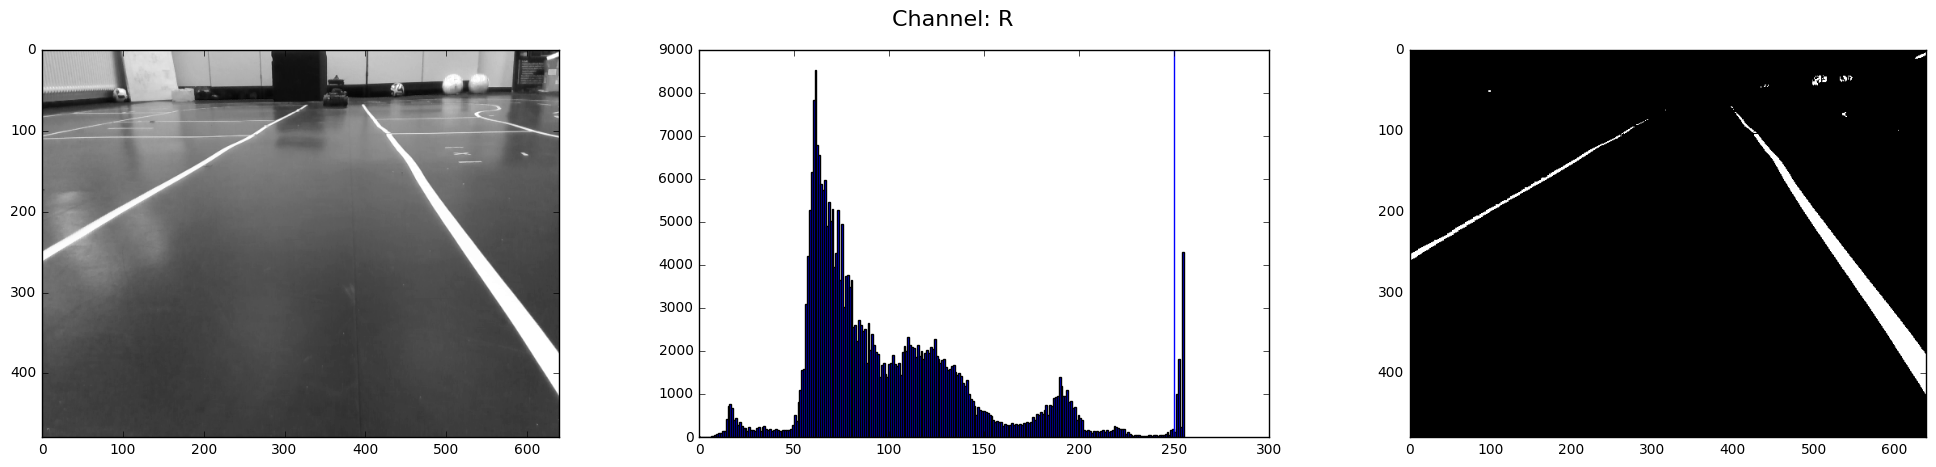

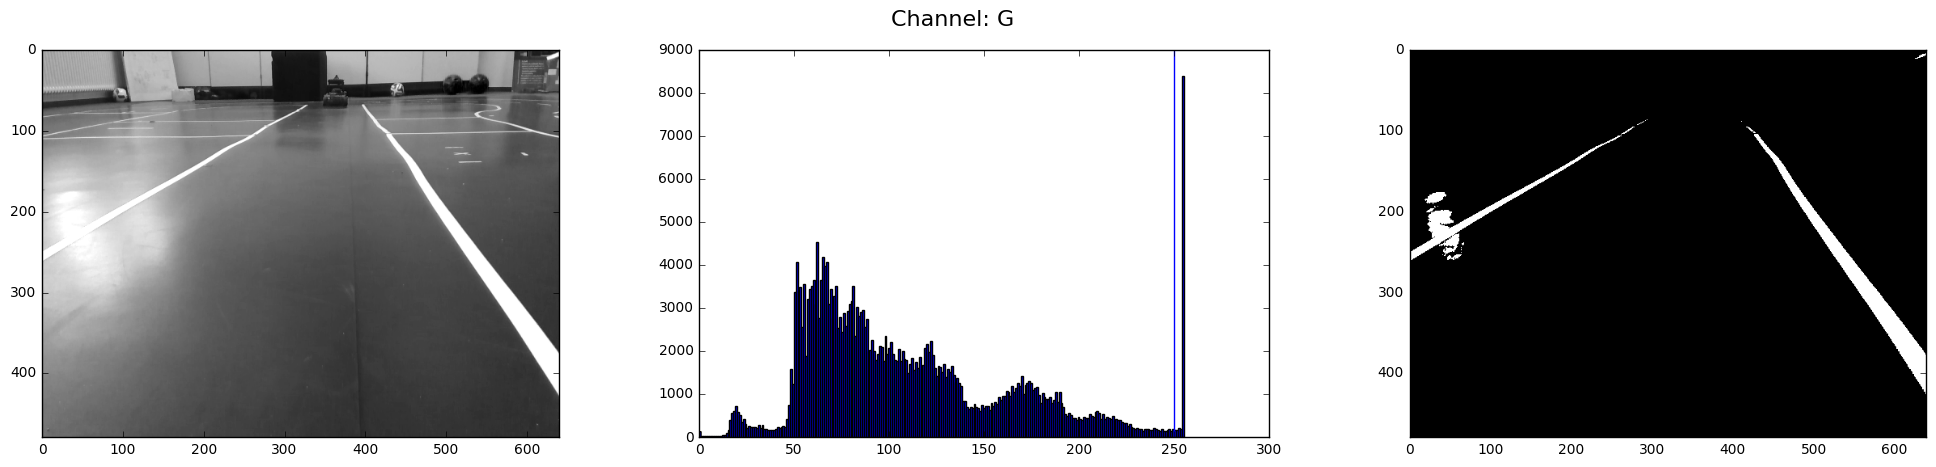

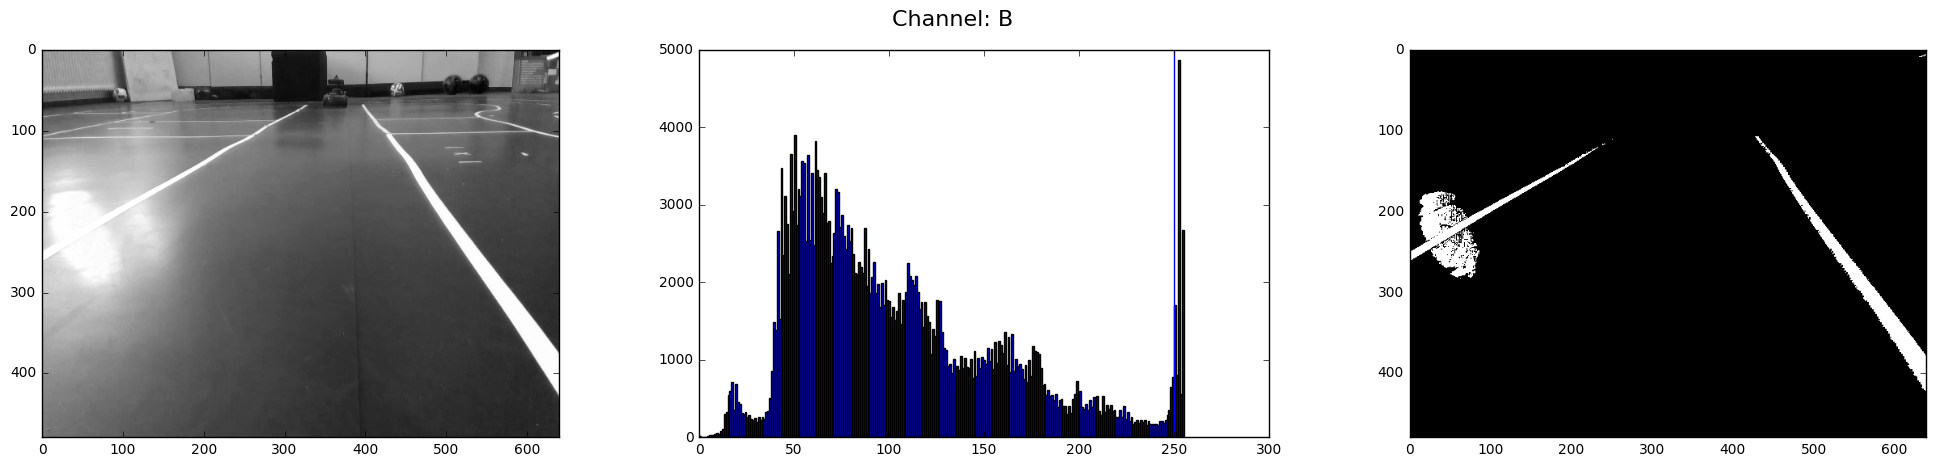

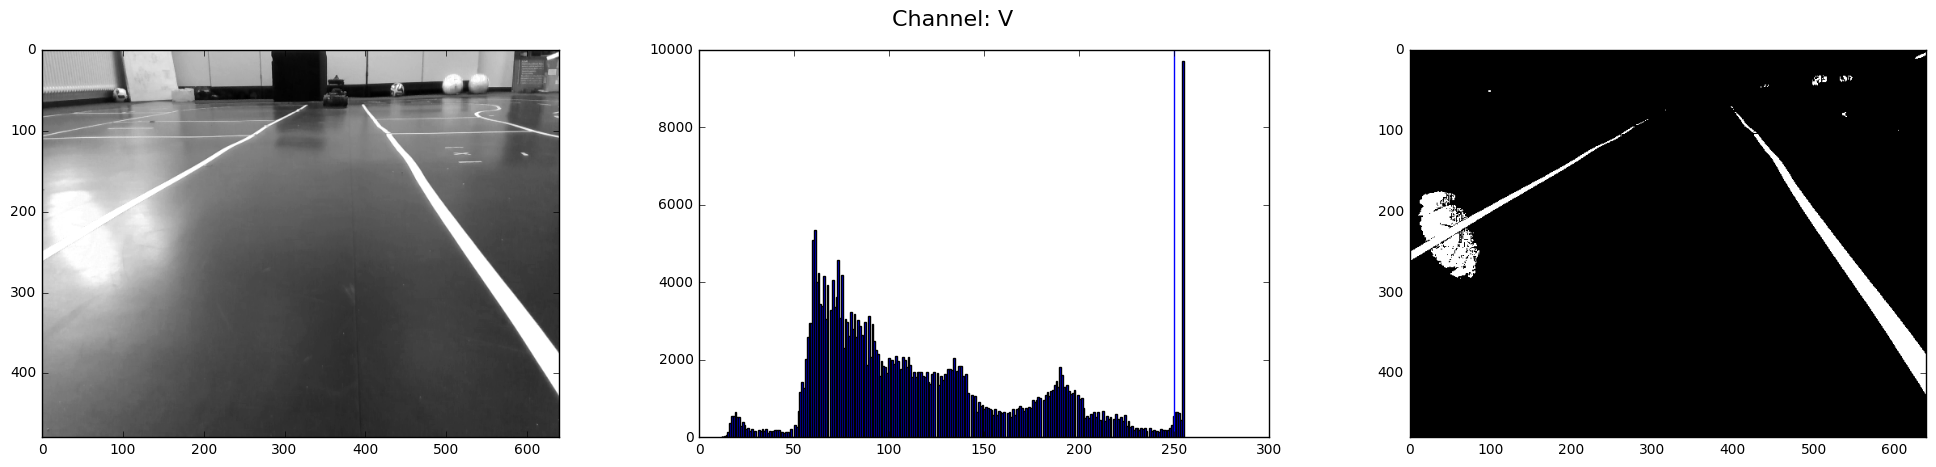

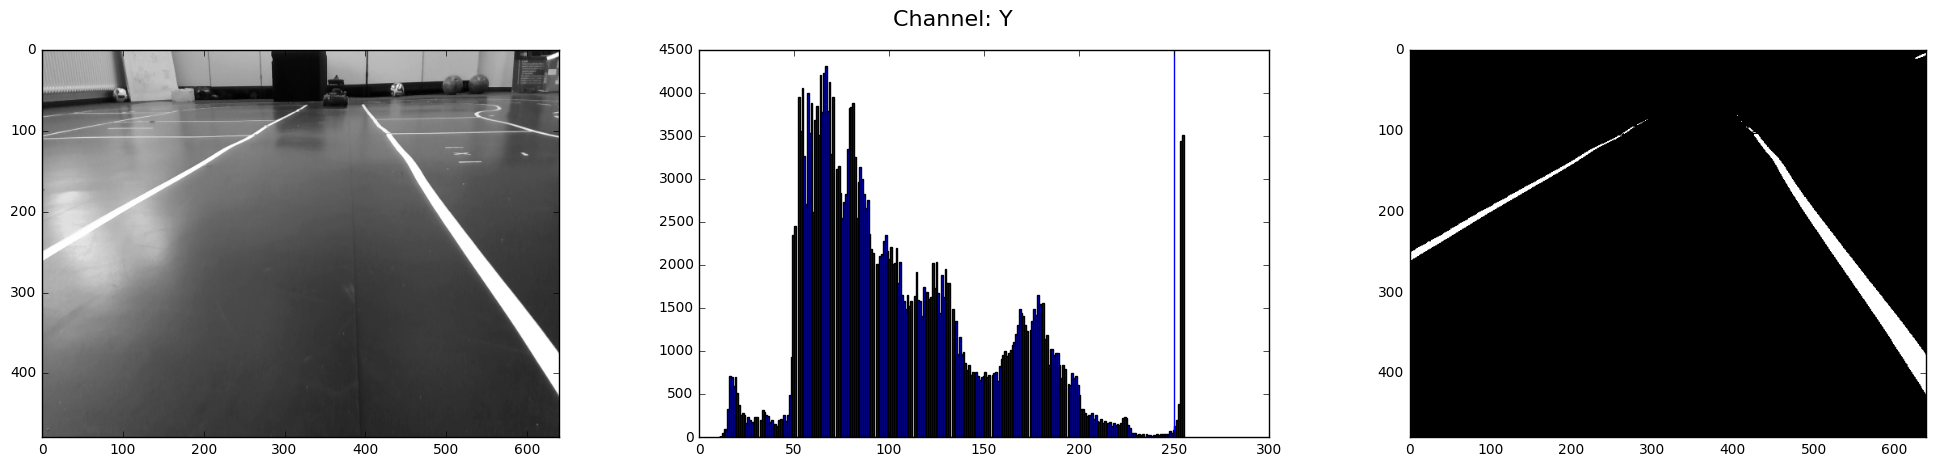

In [113]:
# plot segmentations with our favorite channels (R for RGB, V for HSV, Y for YUV)
for ind, cspace, label in color_spaces:
    segment_plot(cv2.cvtColor(cv_image,cspace)[:,:,ind], 250, label)